# Denoising a photo using nonlocal means algorithms

In this recipe, you will learn how to remove noise from images using nonlocal means algorithms. This functionality is useful when photos suffer from excessive noise and it's necessary to remove it to get a better looking image.

The non-local means algorithm is implemented in OpenCV by a family of functions: `cv2.fastNlMeansDenoising`, `cv2.fastNlMeansDenoisingColored`, `cv2.fastNlMeansMulti`, and `cv2.fastNlMeansDenoisingColoredMulti`. These functions take either one image or multiple images, gray-scale or color. In this recipe, we used the `cv2.fastNlMeansDenoisingColored` function, which takes a single **BGR** image and returns a denoised one. The function takes a few parameters, among them the parameter $h$, which stands for denoising strength; higher values leads to less noise, but a more smoothed image. The other parameters specify non-local means algorithms parameters such as template pattern size and search window space (named correspondingly).

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None, pxstep=None,pystep=None):
    #print("{0} XY{1} color{2} X{3} Y{4}".format(img.shape, pxystep,major_color,pxstep,pystep))
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pXstep = pYstep = pxystep;
    else:
        pXstep = pxstep if pxstep != None else 100
        pYstep = pystep if pystep != None else 100
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img

def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S08\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s08\env

d:\html_doc\program\opencv\packt\s08\env\lib\site-packages
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\pip-20.1b1-py3.8.egg
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s08\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S08\env


------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]


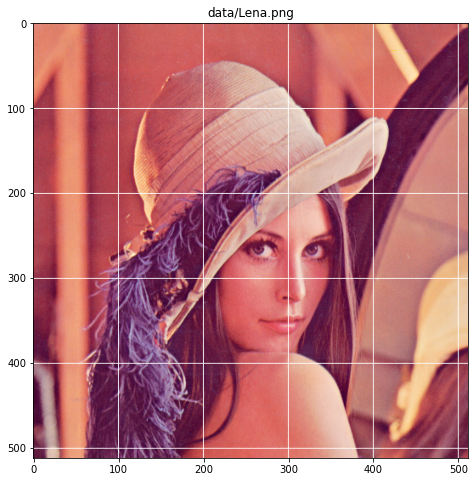

In [2]:
image_orig = cv2.imread('../data/Lena.png')


###############################################
print_image('data/Lena.png','image_orig',image_orig,0,2,0,7)


plt_view_image(plt,[["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

### Generate a random Gaussian noise:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
------  noise--------------------    Shape(512, 512, 3) noise: float64
[[13.54938095 40.25527121 24.81212387] [-62.19342353 -36.67165899 -17.69913255] [-56.09067981 -31.86262065 -13.0998732 ] [-18.37967082  19.1335055   -2.27489246] [43.67853346 26.91263308 11.52749843] [ 6.23148504 29.28130537  2.43625839] [-22.46424035  11.57324711  33.77750977] ]
[[45.85393815 -6.48547982 12.66806485] [-14.39054812  70.41162492  -7.58730974] [-13.27741186  33.66384412  17.04585576] [ 21.24156431   0.51574803 -44.07430857] [40.74100872 -0.26453593 29.9043032 ] [-32.72742201 -56.7920266   37.65219224] [ 24.19714782 -27.01971368  11.50567159] ]


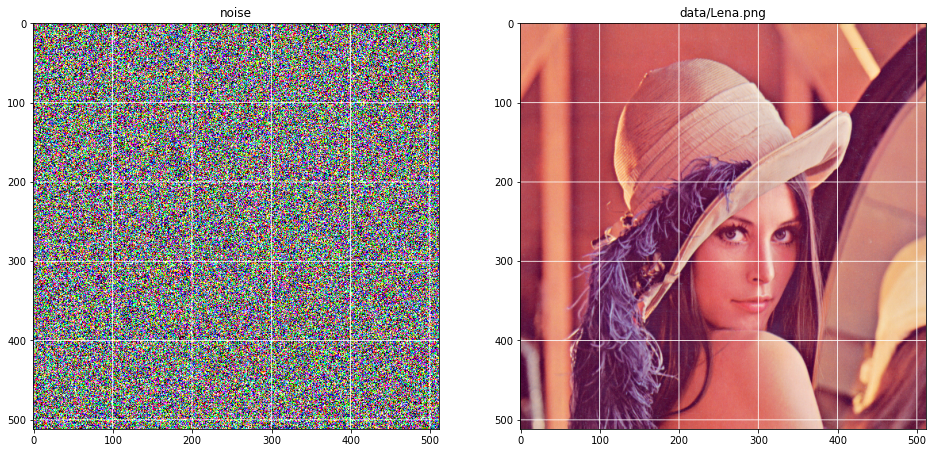

In [3]:
noise = 30 * np.random.randn(*image_orig.shape)


###############################################
print_image('data/Lena.png','image_orig',image_orig,0,2,0,7)
print_image('noise','noise',noise,0,2,0,7)


plt_view_image(plt,[["noise", draw_grid(np.copy(noise),100,(255,255,255))[:,:,[2,1,0]]],
                   ["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
------  noise--------------------    Shape(512, 512, 3) noise: float64
[[13.54938095 40.25527121 24.81212387] [-62.19342353 -36.67165899 -17.69913255] ]
[[45.85393815 -6.48547982 12.66806485] [-14.39054812  70.41162492  -7.58730974] ]
------  image_noise_sign---------    Shape(512, 512, 3) image_noise_sign: float64
[[138.54938095 177.25527121 250.81212387] [ 62.80657647 100.32834101 208.30086745] ]
[[170.85393815 130.51452018 238.66806485] [110.60945188 207.41162492 218.41269026] ]
------  image_noise_sign.astype(int)    Shape(512, 512, 3) image_noise_sign: int32
[[138 177 250] [ 62 100 208] [ 76 105 209] [109 155 220] [163 164 237] [122 158 228] [100 149 261] ]
[[170 130 238] [110 207 218] [119 170 240] [149 136 1

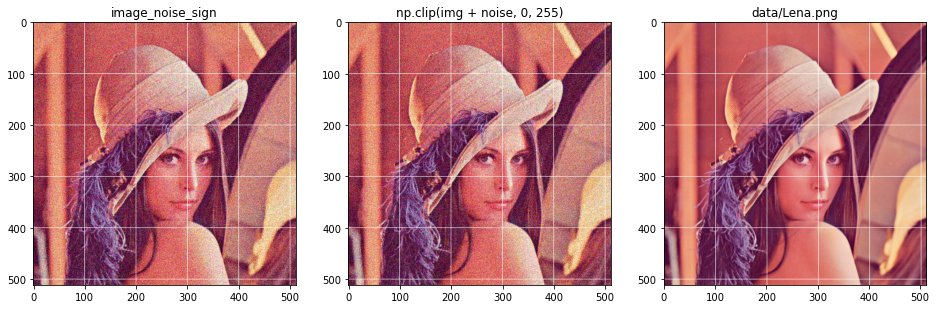

In [4]:
image_noise_sign = image_orig + noise
image_noise = np.uint8(np.clip(image_orig + noise, 0, 255))




###############################################
print_image('data/Lena.png','image_orig',image_orig,0,2,0,7)
print_image('noise','noise',noise,0,2,0,2)
print_image('image_noise_sign','image_noise_sign',image_noise_sign,0,2,0,2)
print_image('image_noise_sign.astype(int)','image_noise_sign',image_noise_sign.astype(int),0,2,0,7)
print_image('image_noise','image_noise',image_noise,0,2,0,7)


plt_view_image(plt,[["image_noise_sign", 
                     draw_grid(np.copy(image_noise_sign.astype(int)),100,(255,255,255))[:,:,[2,1,0]]],
                    ["np.clip(img + noise, 0, 255)", 
                     draw_grid(np.copy(image_noise),100,(255,255,255))[:,:,[2,1,0]]],
                    ["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

### Perform denoising using the non-local means algorithm:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


------  data/Lena.png------------    Shape(512, 512, 3) image_orig: uint8
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
[[125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]
------  noise--------------------    Shape(512, 512, 3) noise: float64
[[13.54938095 40.25527121 24.81212387] [-62.19342353 -36.67165899 -17.69913255] ]
[[45.85393815 -6.48547982 12.66806485] [-14.39054812  70.41162492  -7.58730974] ]
------  image_noise_sign---------    Shape(512, 512, 3) image_noise_sign: float64
[[138.54938095 177.25527121 250.81212387] [ 62.80657647 100.32834101 208.30086745] ]
[[170.85393815 130.51452018 238.66806485] [110.60945188 207.41162492 218.41269026] ]
------  image_noise_sign.astype(int)    Shape(512, 512, 3) image_noise_sign: int32
[[138 177 250] [ 62 100 208] [ 76 105 209] [109 155 220] [163 164 237] [122 158 228] [100 149 261] ]
[[170 130 238] [110 207 218] [119 170 240] [149 136 1

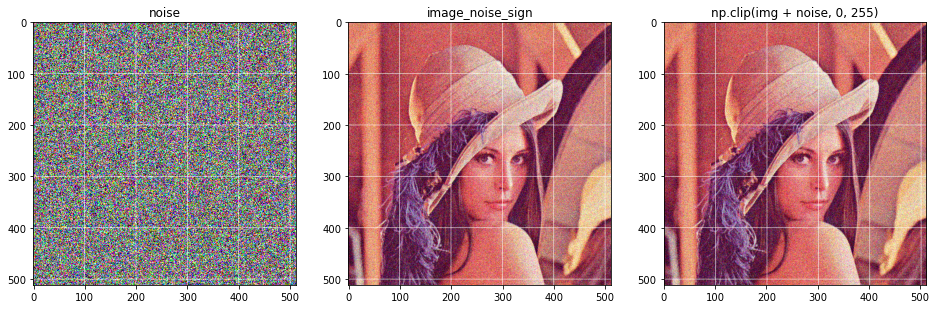

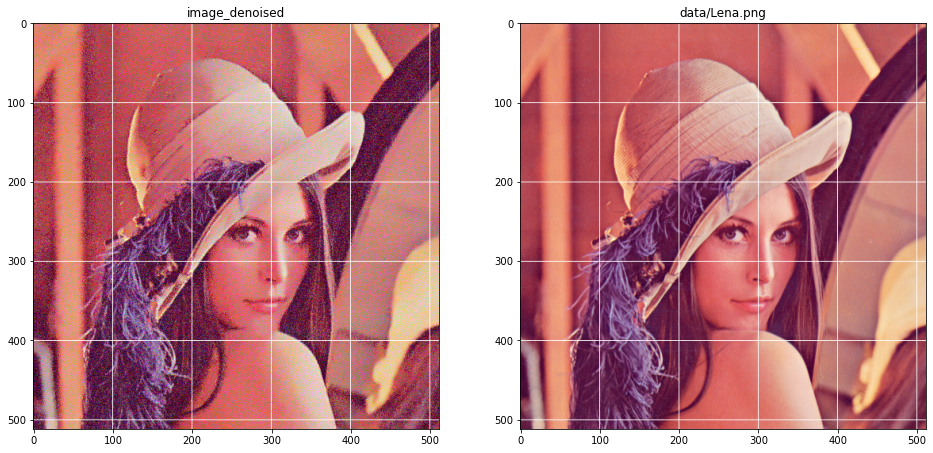

In [5]:
image_denoised = cv2.fastNlMeansDenoisingColored(image_noise, None, 10)



###############################################
print_image('data/Lena.png','image_orig',image_orig,0,2,0,7)
print_image('noise','noise',noise,0,2,0,2)
print_image('image_noise_sign','image_noise_sign',image_noise_sign,0,2,0,2)
print_image('image_noise_sign.astype(int)','image_noise_sign',image_noise_sign.astype(int),0,2,0,7)
print_image('image_noise','image_noise',image_noise,0,2,0,7)
print_image('image_denoised','image_denoised',image_denoised,0,2,0,7)


plt_view_image(plt,[["noise", draw_grid(np.copy(noise),100,(255,255,255))[:,:,[2,1,0]]],
                    ["image_noise_sign", 
                     draw_grid(np.copy(image_noise_sign.astype(int)),100,(255,255,255))[:,:,[2,1,0]]],
                    ["np.clip(img + noise, 0, 255)", 
                     draw_grid(np.copy(image_noise),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')
plt_view_image(plt,[["image_denoised", draw_grid(np.copy(image_denoised),100,(255,255,255))[:,:,[2,1,0]]],
                    ["data/Lena.png", draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')